In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Customer_Segment.xlsx')
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df1 = df.drop(['StockCode','Description', 'Country','lower'], axis = 1)
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


In [5]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [6]:
df1.dropna(axis = 0, how = 'any',inplace=True)
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


In [7]:
df1[df1["Quantity"]<0]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,-1,2010-12-01 09:41:00,27.50,14527.0
154,C536383,-1,2010-12-01 09:49:00,4.65,15311.0
235,C536391,-12,2010-12-01 10:24:00,1.65,17548.0
236,C536391,-24,2010-12-01 10:24:00,0.29,17548.0
237,C536391,-24,2010-12-01 10:24:00,0.29,17548.0
...,...,...,...,...,...
540449,C581490,-11,2011-12-09 09:57:00,0.83,14397.0
541541,C581499,-1,2011-12-09 10:28:00,224.69,15498.0
541715,C581568,-5,2011-12-09 11:57:00,10.95,15311.0
541716,C581569,-1,2011-12-09 11:58:00,1.25,17315.0


In [8]:
# replacing all negative value to 0
df1["Quantity"]=np.where(df1["Quantity"]<0,0,df1["Quantity"])

In [9]:
df1[df1["Quantity"]<0]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID


In [10]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,10.20
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,12.60
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0,16.60
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0,16.60


In [11]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [12]:
df3=df2.drop(["InvoiceDate","CustomerID"],axis=1)
df3.head()

,InvoiceNo,Total
0,536365,15.30
1,536365,20.34
2,536365,22.00
3,536365,20.34
4,536365,20.34


In [13]:
df4=df2.drop(["Total"],axis=1)
df4.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
1,536365,2010-12-01 08:26:00,17850.0
2,536365,2010-12-01 08:26:00,17850.0
3,536365,2010-12-01 08:26:00,17850.0
4,536365,2010-12-01 08:26:00,17850.0


In [14]:
df3=df3.groupby(["InvoiceNo"]).sum()
df3.head()

,Total
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [15]:
df3.reset_index(inplace=True)

In [16]:
df4=df4.drop_duplicates(subset=["InvoiceNo"])
df4.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
7,536366,2010-12-01 08:28:00,17850.0
9,536367,2010-12-01 08:34:00,13047.0
21,536368,2010-12-01 08:34:00,13047.0
25,536369,2010-12-01 08:35:00,13047.0


In [17]:
df_final=pd.merge(df4,df3,how="left",on="InvoiceNo")
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
22185,581583,2011-12-09 12:23:00,13777.0,124.60
22186,581584,2011-12-09 12:25:00,13777.0,140.64
22187,581585,2011-12-09 12:31:00,15804.0,329.05
22188,581586,2011-12-09 12:49:00,13113.0,339.20


In [18]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [19]:
RFMScore=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                            "InvoiceNo":lambda x:x.count(),
                                            "Total":lambda x:x.sum()})
RFMScore.head()

,InvoiceDate,InvoiceNo,Total
CustomerID,,,
12346.0,325,2,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


In [20]:
RFMScore=RFMScore.reset_index()
RFMScore.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,2,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [21]:
RFMScore=RFMScore.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


<AxesSubplot:xlabel='Recency', ylabel='Proportion'>

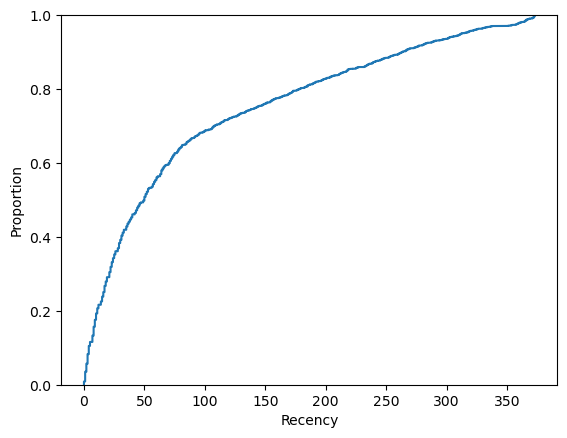

In [22]:
import seaborn as sns
sns.ecdfplot(data=RFMScore["Recency"])

In [23]:
RFMScore["Recency"].quantile(q=[0.30,0.55,0.75])

0.30     21.0
0.55     59.0
0.75    143.0
Name: Recency, dtype: float64

<AxesSubplot:xlabel='Frequency', ylabel='Proportion'>

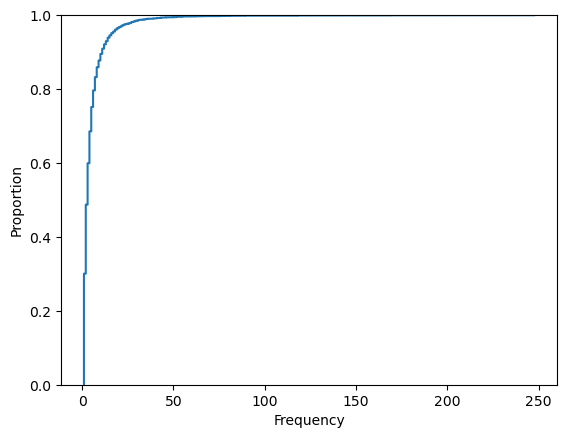

In [24]:
sns.ecdfplot(data=RFMScore["Frequency"])

In [25]:
RFMScore["Frequency"].quantile(q=[0.80,0.98,0.998])

0.800     7.000
0.980    27.000
0.998    78.032
Name: Frequency, dtype: float64

<AxesSubplot:xlabel='Monetary', ylabel='Proportion'>

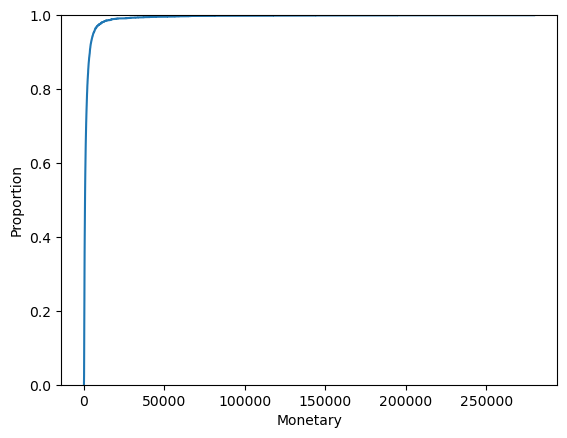

In [26]:
sns.ecdfplot(data=RFMScore["Monetary"])

In [27]:
RFMScore["Monetary"].quantile(q=[0.65,0.98,0.998])

0.650     1110.36700
0.980    11065.23180
0.998    78174.63992
Name: Monetary, dtype: float64

In [28]:
quantile100=RFMScore.quantile(q=[0.30,0.55,0.75])
quantile200=RFMScore.quantile(q=[0.80,0.98,0.998])
quantile300=RFMScore.quantile(q=[0.65,0.98,0.998])


In [29]:
quantile100

,CustomerID,Recency,Frequency,Monetary
0.30,14110.30,21.0,1.0,347.8400
0.55,15596.05,59.0,3.0,778.9715
0.75,16778.25,143.0,5.0,1652.7900


In [30]:
def RScoring(x,p,d):
    if x<=d[p][0.30]:
        return 4
    elif x<=d[p][0.55]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1
    

In [31]:
def FScoring(x,p,d):
    if x<=d[p][0.80]:
        return 1
    elif x<=d[p][0.98]:
        return 2
    elif x<=d[p][0.998]:
        return 3
    else:
        return 4
    

In [32]:
def MScoring(x,p,d):
    if x<=d[p][0.65]:
        return 4
    elif x<=d[p][0.98]:
        return 3
    elif x<=d[p][0.998]:
        return 2
    else:
        return 1
    

In [33]:
RFMScore["R"]=RFMScore["Recency"].apply(RScoring,args=("Recency" ,quantile100,))
RFMScore["F"]=RFMScore["Frequency"].apply(FScoring,args=("Frequency" ,quantile200,))
RFMScore["M"]=RFMScore["Monetary"].apply(MScoring,args=("Monetary" ,quantile300,))

In [34]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,2,77183.60,1,1,2
1,12347.0,2,7,4310.00,4,1,3
2,12348.0,75,4,1797.24,2,1,3
3,12349.0,18,1,1757.55,4,1,3
4,12350.0,310,1,334.40,1,1,4


In [35]:
# create the RFM sum
RFMScore["RFM_sum"]=RFMScore[["R","F","M"]].sum(axis=1)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum
0,12346.0,325,2,77183.60,1,1,2,4
1,12347.0,2,7,4310.00,4,1,3,8
2,12348.0,75,4,1797.24,2,1,3,6
3,12349.0,18,1,1757.55,4,1,3,8
4,12350.0,310,1,334.40,1,1,4,6


In [36]:
loyality_label=["Silver","Gold","Diamond","Platinum"]
score_cuts=pd.qcut(RFMScore.RFM_sum,q=4,labels=loyality_label)
RFMScore["RFM_loyality"]=score_cuts.values

<AxesSubplot:xlabel='Frequency', ylabel='RFM_sum'>

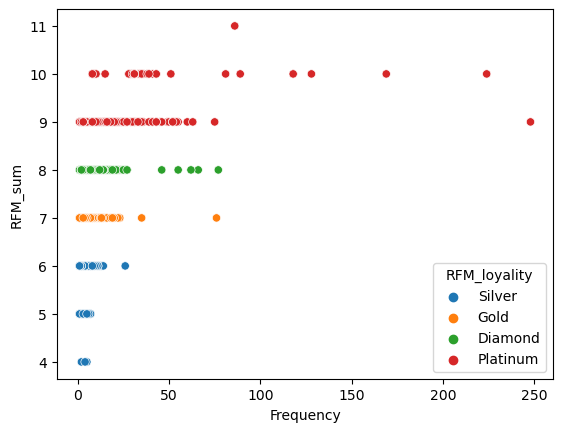

In [37]:
sns.scatterplot(data=RFMScore,x="Frequency",y="RFM_sum",hue="RFM_loyality")

<AxesSubplot:xlabel='Monetary', ylabel='RFM_sum'>

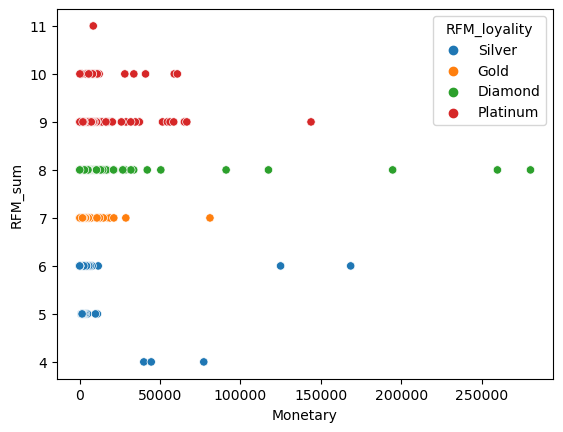

In [38]:
sns.scatterplot(data=RFMScore,x="Monetary",y="RFM_sum",hue="RFM_loyality")


<AxesSubplot:xlabel='Recency', ylabel='RFM_sum'>

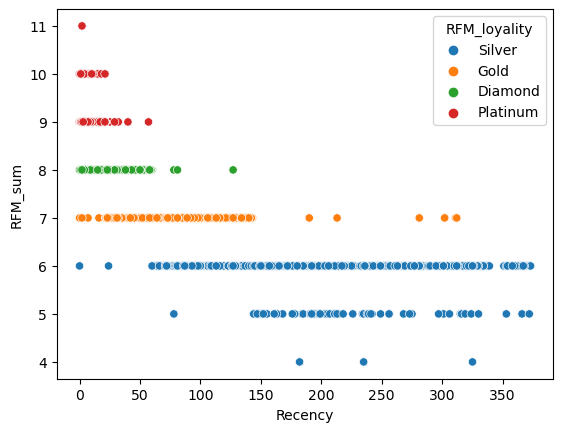

In [39]:
sns.scatterplot(data=RFMScore,x="Recency",y="RFM_sum",hue="RFM_loyality")

In [40]:
RFMScore["RFM_ID"]=RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID
0,12346.0,325,2,77183.60,1,1,2,4,Silver,112
1,12347.0,2,7,4310.00,4,1,3,8,Diamond,413
2,12348.0,75,4,1797.24,2,1,3,6,Silver,213
3,12349.0,18,1,1757.55,4,1,3,8,Diamond,413
4,12350.0,310,1,334.40,1,1,4,6,Silver,114


In [41]:
seg_map={
    r'[1][1-2][2-3]':"Inactive or Passerby customers ",
    r'[1-2][1-3][3]':"at-Risk",
    r'[1-2][1-4][3-4]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
    #r'[3][3][3]':"need_attention",
    r'[3-4][3-4][2-4]':"promising",
    r'[1-2][1-4][1-2]':"new customer",
    r'[3-4][[1-4][1]':'students',
    r'[3-4][[1-2][1-2]':'Nurture',
    r'[3-4][[1-2][3-4]': 'Drive_Loyality',
    }

RFMScore["Segment"]=RFMScore["RFM_ID"].replace(seg_map,regex=True)
RFMScore['Segment'].value_counts()


Drive_Loyality                     2307
cant_lose                          1625
at-Risk                             234
Inactive or Passerby customers       89
promising                            73
Nurture                              33
students                              9
new customer                          2
Name: Segment, dtype: int64

In [42]:
RFMScore

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment
0,12346.0,325,2,77183.60,1,1,2,4,Silver,112,Inactive or Passerby customers
1,12347.0,2,7,4310.00,4,1,3,8,Diamond,413,Drive_Loyality
2,12348.0,75,4,1797.24,2,1,3,6,Silver,213,at-Risk
3,12349.0,18,1,1757.55,4,1,3,8,Diamond,413,Drive_Loyality
4,12350.0,310,1,334.40,1,1,4,6,Silver,114,cant_lose
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,1,4,6,Silver,114,cant_lose
4368,18281.0,180,1,80.82,1,1,4,6,Silver,114,cant_lose
4369,18282.0,7,3,178.05,4,1,4,9,Platinum,414,Drive_Loyality
4370,18283.0,3,16,2094.88,4,2,3,9,Platinum,423,Drive_Loyality


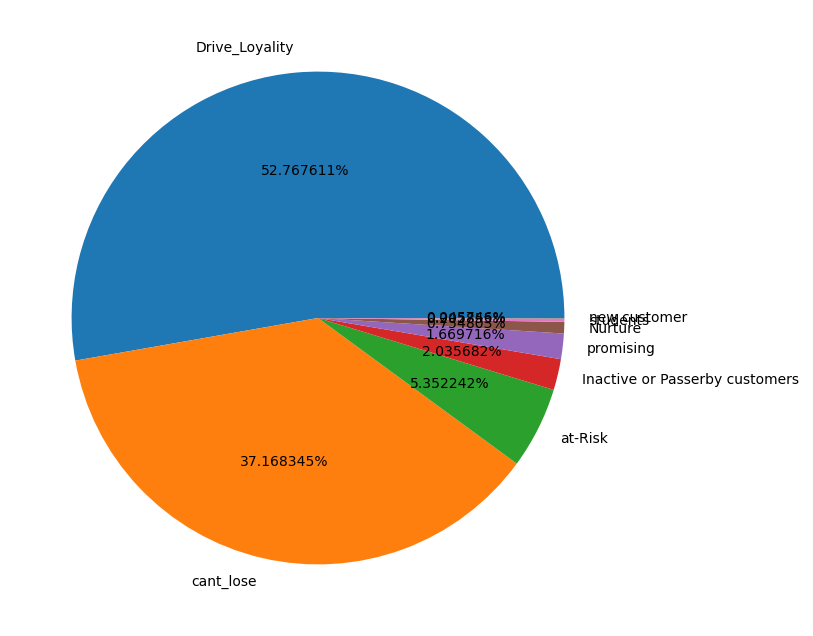

In [43]:

plt.figure(figsize=(12,8))
plt.pie(RFMScore.Segment.value_counts(),labels=RFMScore.Segment.value_counts().index,autopct="%2f%%")
plt.show()


In [44]:
Newdata=RFMScore["RFM_sum"]
Newdata


0       4
1       8
2       6
3       8
4       6
       ..
4367    6
4368    6
4369    9
4370    9
4371    7
Name: RFM_sum, Length: 4372, dtype: int64

In [45]:
# applying the k-means algorithm

from sklearn.cluster import KMeans

SSE=[]

for K in range (1,30):
    Kmeans=KMeans(n_clusters=K,init="k-means++")
    Kmeans.fit(pd.DataFrame(Newdata))
    SSE.append(Kmeans.inertia_)

In [46]:
frame=pd.DataFrame({"cluster":range(1,30),"SSE":SSE})
frame.head()

,cluster,SSE
0,1,6159.578225
1,2,1337.262651
2,3,650.486326
3,4,132.252436
4,5,53.299128


Text(0, 0.5, 'Inertia')

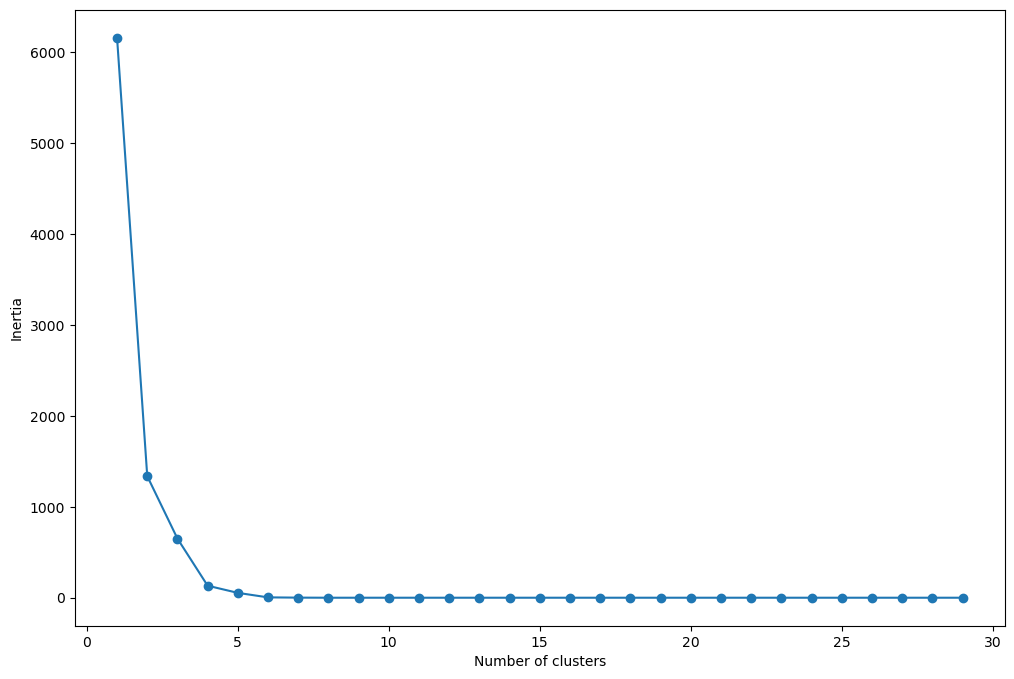

In [47]:
plt.figure(figsize=(12,8))
plt.plot(frame["cluster"],frame["SSE"],marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")


In [48]:
# Fitting data using KMeans algorithm

km=KMeans(n_clusters=4,init="k-means++",max_iter=100,random_state=101)
y_km=km.fit_predict(pd.DataFrame(Newdata))
y_km

array([1, 0, 1, ..., 2, 2, 3])

In [49]:
RFMScore["Cluster"]=km.labels_
RFMScore.head(100)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment,Cluster
0,12346.0,325,2,77183.60,1,1,2,4,Silver,112,Inactive or Passerby customers,1
1,12347.0,2,7,4310.00,4,1,3,8,Diamond,413,Drive_Loyality,0
2,12348.0,75,4,1797.24,2,1,3,6,Silver,213,at-Risk,1
3,12349.0,18,1,1757.55,4,1,3,8,Diamond,413,Drive_Loyality,0
4,12350.0,310,1,334.40,1,1,4,6,Silver,114,cant_lose,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,12462.0,2,4,1189.59,4,1,3,8,Diamond,413,Drive_Loyality,0
96,12463.0,46,7,1344.78,3,1,3,7,Gold,313,Drive_Loyality,3
97,12464.0,10,8,1212.05,4,2,3,9,Platinum,423,Drive_Loyality,2
98,12465.0,7,3,742.19,4,1,4,9,Platinum,414,Drive_Loyality,2


<AxesSubplot:xlabel='Frequency', ylabel='RFM_sum'>

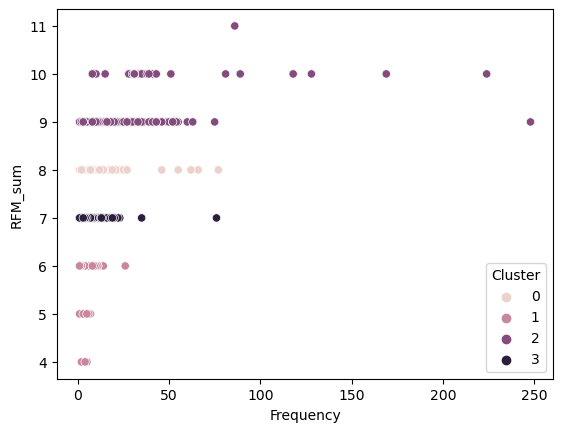

In [50]:
sns.scatterplot(data=RFMScore, x="Frequency", y="RFM_sum", hue="Cluster")

In [51]:
labels=km.labels_

from sklearn.metrics import silhouette_score

print(silhouette_score(pd.DataFrame(Newdata),labels))

0.9574941833350292
